# SIR new paediatric vaccination
This is the Python version of program 8.1 from page 293 of "Modeling Infectious Diseases in humans and animals" by Keeling and Rohani. This is based on code written by Ilias Soumpasis.

In [2]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#parameters (in days)
beta=520/365.0; #transmission rate
gamma=1/7.0;   #recovery rate
mu=1/(70*365.0); #natural/birth rate

S0=0.1; #initial susceptible fraction
I0=1e-4; #initial infected fraction
R0=1-S0-I0 #intial recovered fraction

p0=0.7; #proportion of new born individuals that are vaccinated
tV=30*365; #time at which vaccination starts

ND=MaxTime=100*365;  #number of days
TS=1.0 #time step

INPUT = np.hstack((S0,I0,R0))

In [3]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP   
	Y[0]= mu*(1-p) - beta*V[0]*V[1] - mu*V[0]
	Y[1]= beta*V[0]*V[1] - gamma*V[1] - mu*V[1]
	Y[2]= mu*p + gamma*V[1] - mu*V[2]
	return Y   # For odeint

In [6]:
#before vaccination
t_start = 0.0; t_end = tV; t_inc = TS #
t_range1 = np.arange(t_start, t_end+t_inc, t_inc)
t_start = tV; t_end = ND; t_inc = TS
p=0
RES1 = spi.odeint(diff_eqs,INPUT,t_range1)
#now with vaccination
t_range2 = np.arange(tV, t_end+t_inc, t_inc)
p=p0
RES2 = spi.odeint(diff_eqs,RES1[-1],t_range2)

T = np.hstack((t_range1, t_range2))

S = np.hstack((RES1[:,0],RES2[:,0]))
I = np.hstack((RES1[:,1],RES2[:,1]))
R = np.hstack((RES1[:,2],RES2[:,2]))

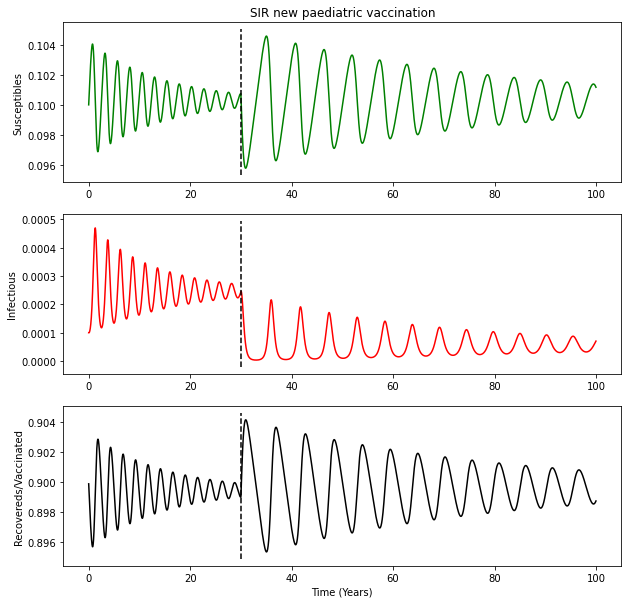

<Figure size 432x288 with 0 Axes>

In [10]:
#plotting
fig=plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('SIR new paediatric vaccination')

fig.add_subplot(311)
plt.plot(T[1:,]/365.0, S[1:,], '-g')
ll=plt.ylim()
tVV=np.repeat([tV/365.],len(ll))
plt.plot(tVV, ll, '--k')
plt.ylabel('Susceptibles')

fig.add_subplot(312)
plt.plot(T[1:,]/365.0, I[1:,], '-r')
ll=plt.ylim()
tVV=np.repeat([tV/365.],len(ll))
plt.plot(tVV, ll, '--k')
plt.ylabel('Infectious')

fig.add_subplot(313)
plt.plot(T[1:,]/365.0, R[1:,], '-k')
ll=plt.ylim()
tVV=np.repeat([tV/365.],len(ll))
plt.plot(tVV, ll, '--k')
plt.ylabel('Recovereds/Vaccinated')

plt.xlabel('Time (Years)')

plt.show()
plt.savefig('SIR_new_vaccination.pdf')